In [1]:
import pandas as pd

coffee = pd.read_csv('coffee.csv')

coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


In [2]:
coffee


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,1/1/2023,7:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,1/1/2023,7:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,1/1/2023,7:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,1/1/2023,7:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,1/1/2023,7:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,30/6/2023,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,30/6/2023,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,30/6/2023,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,30/6/2023,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [3]:
# Calculate the total order of each product type
total_orders_df = coffee.groupby(['product_category', 'product_type'])['transaction_qty'].sum().reset_index()

# Rename columns as required
total_orders_df.columns = ['product_category', 'product_type', 'total_order']

# Display the resulting DataFrame
total_orders_df


,product_category,product_type,total_order
0,Bakery,Biscotti,5788
1,Bakery,Pastry,6961
2,Bakery,Scone,10465
3,Branded,Clothing,221
4,Branded,Housewares,555
5,Coffee,Barista Espresso,24943
6,Coffee,Drip coffee,12891
7,Coffee,Gourmet brewed coffee,25973
8,Coffee,Organic brewed coffee,13012
9,Coffee,Premium brewed coffee,12431


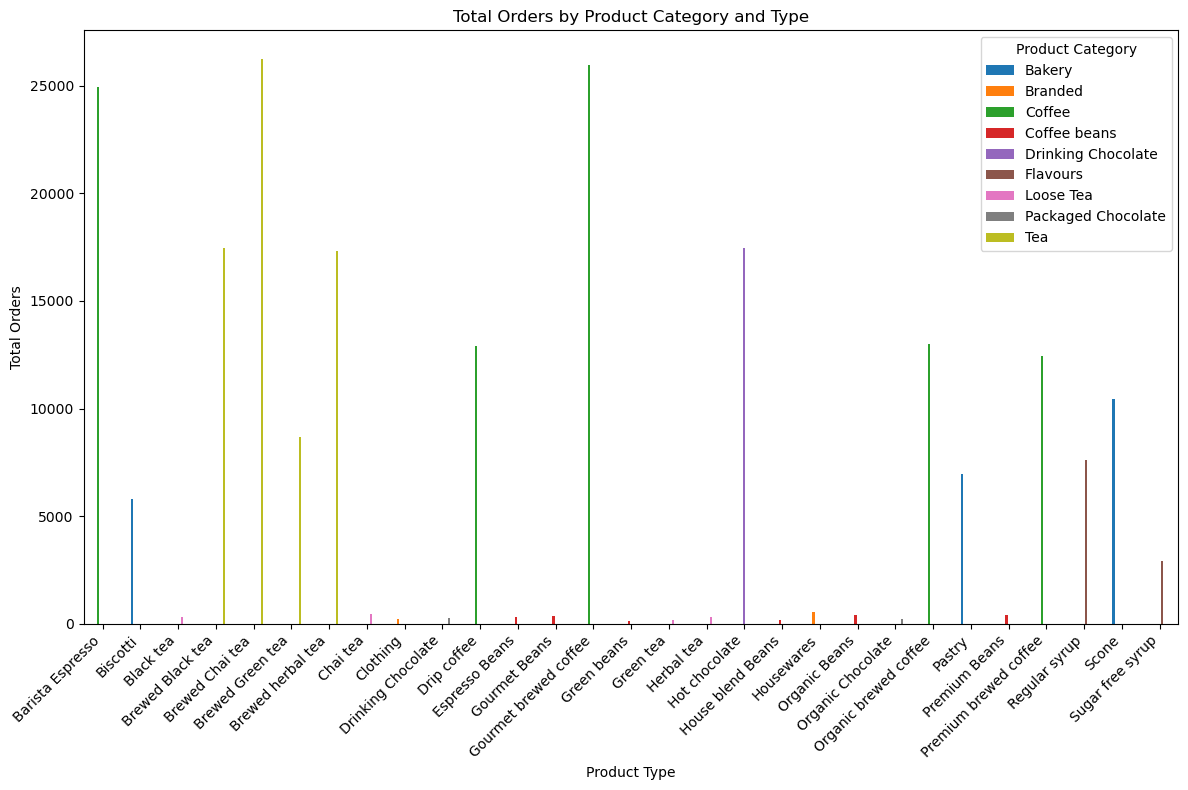

In [4]:
import matplotlib.pyplot as plt
pivot_df = total_orders_df.pivot(index='product_type', columns='product_category', values='total_order')

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

pivot_df.plot(kind='bar', ax=ax)

# Set chart labels and title
ax.set_xlabel('Product Type')
ax.set_ylabel('Total Orders')
ax.set_title('Total Orders by Product Category and Type')
ax.legend(title='Product Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45,ha='right')

# Adjust layout to fit all elements
plt.tight_layout()

# Show plot
plt.show()

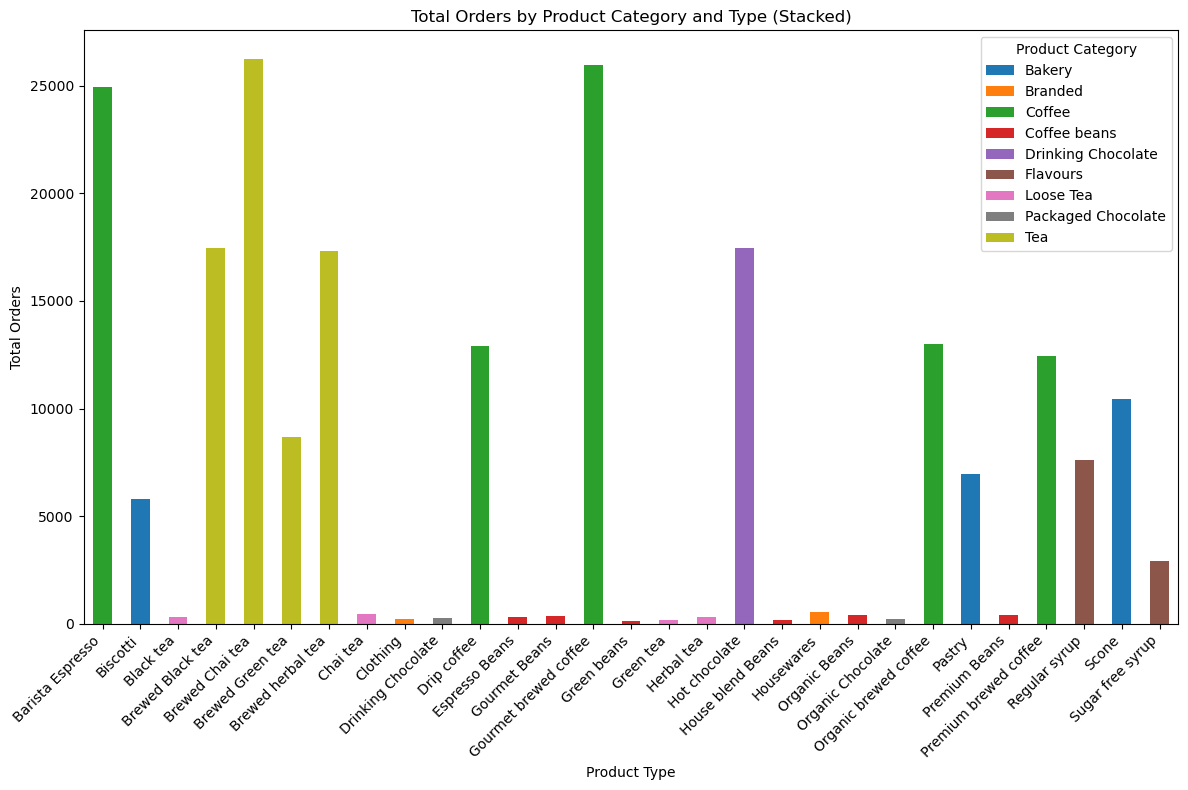

In [5]:
import matplotlib.pyplot as plt

# Create a pivot table for plotting
pivot_df = total_orders_df.pivot(index='product_type', columns='product_category', values='total_order')

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

pivot_df.plot(kind='bar', stacked=True, ax=ax)

# Set chart labels and title
ax.set_xlabel('Product Type')
ax.set_ylabel('Total Orders')
ax.set_title('Total Orders by Product Category and Type (Stacked)')
ax.legend(title='Product Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45,ha='right')

# Adjust layout to fit all elements
plt.tight_layout()

# Show plot
plt.show()


D:\Tyanj\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Tyanj\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


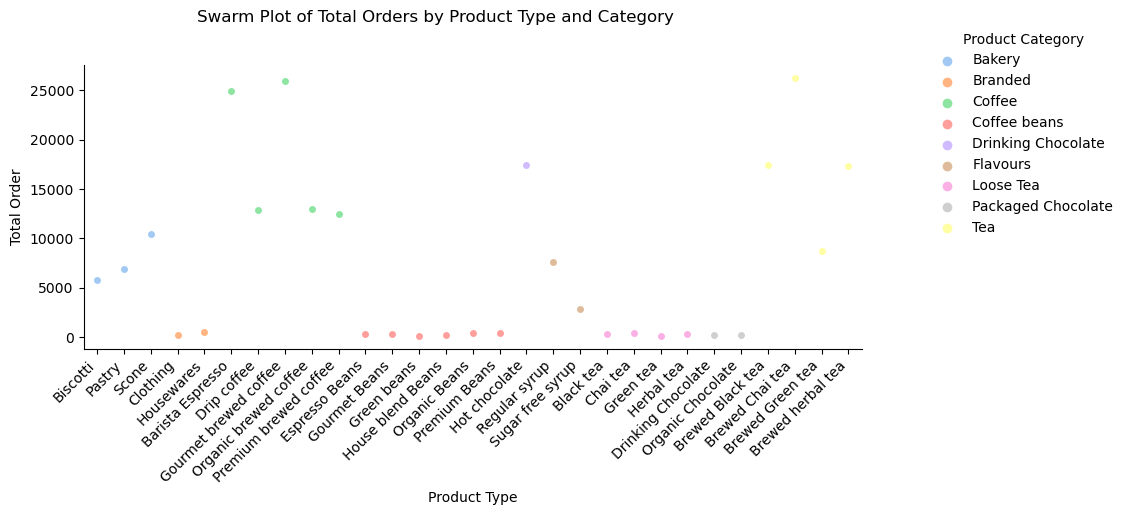

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the catplot
g = sns.catplot(
    x="product_type", 
    y="total_order", 
    kind="swarm", 
    palette="pastel", 
    hue="product_category", 
    data=total_orders_df
)

# Customize the plot
g.fig.suptitle('Swarm Plot of Total Orders by Product Type and Category', y=1.02)  # Adjust title position
g.set_xticklabels(rotation=45, ha='right')  # Rotate x-axis labels

# Adjust axis labels
g.set_axis_labels('Product Type', 'Total Order')  # Set axis labels with first letter capitalized

# Adjust legend
# First remove any existing legend to avoid overlap
g._legend.remove()  

# Create a new legend with better spacing
g.add_legend(
    title='Product Category',
    bbox_to_anchor=(1.05, 1),  # Adjust legend position
    loc='upper left',
    title_fontsize='13',       # Adjust legend title font size
    fontsize='10',            # Adjust legend font size
    frameon=False              # Remove legend frame for cleaner look
)

# Adjust the layout to make room for the legend
plt.subplots_adjust(right=0.85)  # Increase space on the right side for legend

# Show plot
plt.tight_layout()
plt.show()
